In [1]:
import os
import re

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import soundfile as sf
from tqdm import tqdm

In [4]:
def language(text):
    if text=='de':
        return 'Germany'
    elif text=='en':
        return 'English'
    else:
        return 'Spanish'

In [5]:
def gender(text):
    if text=='f':
        return 'Female'
    else:
        return 'Male'

In [6]:
def transformation(text):
    text=re.sub(r'[0-9]+','',text)
    if text=='fragment':
        return 'No Transformation'
    else:
        return text.capitalize()

In [7]:
def data_transform_abbr(data):
    df=data
    df['Language']=df['language'].apply(language)
    df['Gender']=df['gender'].apply(gender)
    df['Transformation']=df['transformation'].apply(transformation)
    return df

In [8]:
def get_duration(folder_path,filename):
    data_length=[]
    for i in filename:
        path=folder_path+'/'+i
        data,fr=sf.read(path)
        data_length.append(len(data)/fr)
    return data_length

In [9]:
'''
Function to get dataframe ABOUT data (not the data itself)
Expected input
type=string,
cat=train/test
'''
def know_your_data(cat):
    folder_path='Dataset/'+cat
    filename=os.listdir(folder_path)
    
    language=[i[:2] for i in filename]
    gender=[i[3:4] for i in filename]
    # this when you don't know what kind of file extension that exist in your dataset 
    extension=[i.split('.')[-1] for i in filename]
    transformation=[i.split('.')[-2] for i in filename]
    duration=get_duration(folder_path,filename)
    data_stats=pd.DataFrame([language,gender,transformation,duration,filename])
    data_stats=data_stats.T
    data_stats.columns=['language','gender','transformation','duration','filename']
    
    data=data_transform_abbr(data_stats)
    
    return data

In [10]:
df_test=know_your_data('test')

In [11]:
df_train=know_your_data('train')

## Simple Distribution Visualization 

### Data Train

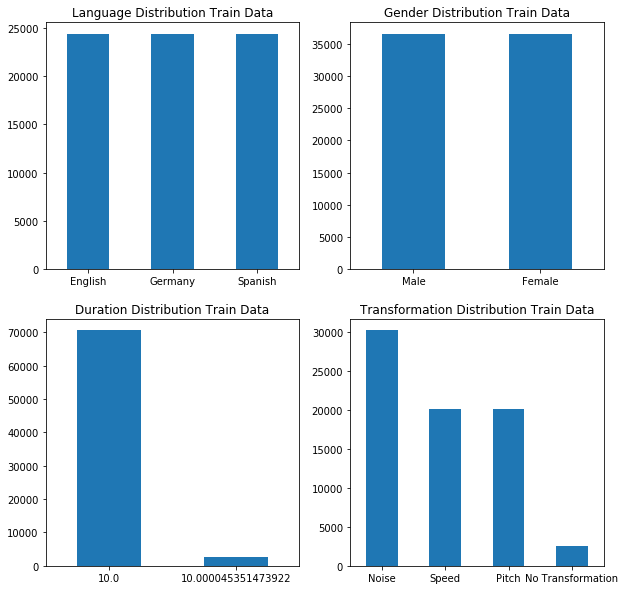

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(10,10))
df_train.Language.value_counts().plot(ax=axes[0,0],kind='bar',title='Language Distribution Train Data',rot=0)
df_train.Gender.value_counts().plot(ax=axes[0,1],kind='bar',title='Gender Distribution Train Data',rot=0)
df_train.Transformation.value_counts().plot(ax=axes[1,1],kind='bar',title='Transformation Distribution Train Data',rot=0)
df_train.duration.value_counts().plot(ax=axes[1,0],kind='bar',title='Duration Distribution Train Data',rot=0)

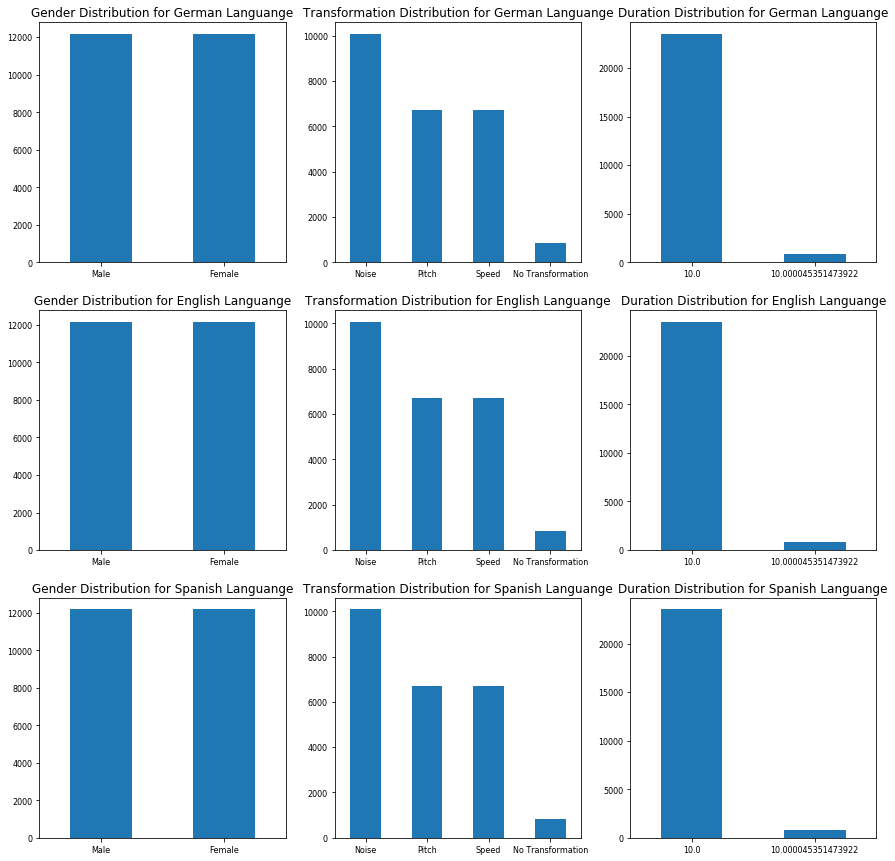

In [13]:
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(15,15))
df_train[df_train['Language']=='Germany'].Gender.value_counts().plot(ax=axes[0,0],kind='bar',title='Gender Distribution for German Languange',rot=0,fontsize=8)
df_train[df_train['Language']=='Germany'].Transformation.value_counts().plot(ax=axes[0,1],kind='bar',title='Transformation Distribution for German Languange',rot=0,fontsize=8)
df_train[df_train['Language']=='Germany'].duration.value_counts().plot(ax=axes[0,2],kind='bar',title='Duration Distribution for German Languange',rot=0,fontsize=8)


df_train[df_train['Language']=='English'].Gender.value_counts().plot(ax=axes[1,0],kind='bar',title='Gender Distribution for English Languange',rot=0,fontsize=8)
df_train[df_train['Language']=='English'].Transformation.value_counts().plot(ax=axes[1,1],kind='bar',title='Transformation Distribution for English Languange',rot=0,fontsize=8)
df_train[df_train['Language']=='English'].duration.value_counts().plot(ax=axes[1,2],kind='bar',title='Duration Distribution for English Languange',rot=0,fontsize=8)

df_train[df_train['Language']=='Spanish'].Gender.value_counts().plot(ax=axes[2,0],kind='bar',title='Gender Distribution for Spanish Languange',rot=0,fontsize=8)
df_train[df_train['Language']=='Spanish'].Transformation.value_counts().plot(ax=axes[2,1],kind='bar',title='Transformation Distribution for Spanish Languange',rot=0,fontsize=8)
df_train[df_train['Language']=='Spanish'].duration.value_counts().plot(ax=axes[2,2],kind='bar',title='Duration Distribution for Spanish Languange',rot=0,fontsize=8)

### Data Test

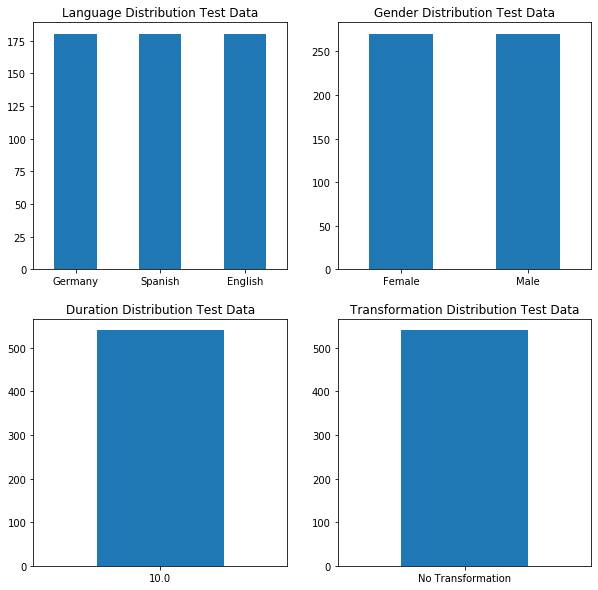

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(10,10))
df_test.Language.value_counts().plot(ax=axes[0,0],kind='bar',title='Language Distribution Test Data',rot=0)
df_test.Gender.value_counts().plot(ax=axes[0,1],kind='bar',title='Gender Distribution Test Data',rot=0)
df_test.Transformation.value_counts().plot(ax=axes[1,1],kind='bar',title='Transformation Distribution Test Data',rot=0)
df_test.duration.value_counts().plot(ax=axes[1,0],kind='bar',title='Duration Distribution Test Data',rot=0)

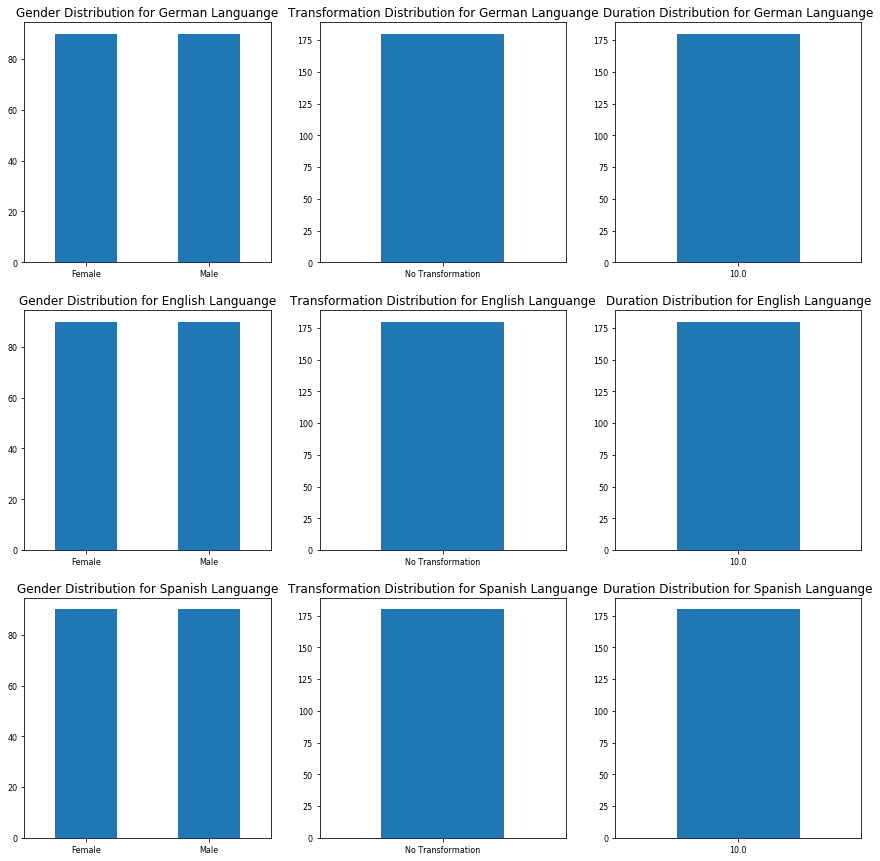

In [15]:
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(15,15))
df_test[df_test['Language']=='Germany'].Gender.value_counts().plot(ax=axes[0,0],kind='bar',title='Gender Distribution for German Languange',rot=0,fontsize=8)
df_test[df_test['Language']=='Germany'].Transformation.value_counts().plot(ax=axes[0,1],kind='bar',title='Transformation Distribution for German Languange',rot=0,fontsize=8)
df_test[df_test['Language']=='Germany'].duration.value_counts().plot(ax=axes[0,2],kind='bar',title='Duration Distribution for German Languange',rot=0,fontsize=8)


df_test[df_test['Language']=='English'].Gender.value_counts().plot(ax=axes[1,0],kind='bar',title='Gender Distribution for English Languange',rot=0,fontsize=8)
df_test[df_test['Language']=='English'].Transformation.value_counts().plot(ax=axes[1,1],kind='bar',title='Transformation Distribution for English Languange',rot=0,fontsize=8)
df_test[df_test['Language']=='English'].duration.value_counts().plot(ax=axes[1,2],kind='bar',title='Duration Distribution for English Languange',rot=0,fontsize=8)

df_test[df_test['Language']=='Spanish'].Gender.value_counts().plot(ax=axes[2,0],kind='bar',title='Gender Distribution for Spanish Languange',rot=0,fontsize=8)
df_test[df_test['Language']=='Spanish'].Transformation.value_counts().plot(ax=axes[2,1],kind='bar',title='Transformation Distribution for Spanish Languange',rot=0,fontsize=8)
df_test[df_test['Language']=='Spanish'].duration.value_counts().plot(ax=axes[2,2],kind='bar',title='Duration Distribution for Spanish Languange',rot=0,fontsize=8)

In [16]:
df_train.head()

,language,gender,transformation,duration,filename,Language,Gender,Transformation
0,de,f,fragment1,10,de_f_0809fd0642232f8c85b0b3d545dc2b5a.fragment...,Germany,Female,No Transformation
1,de,f,noise1,10,de_f_0809fd0642232f8c85b0b3d545dc2b5a.fragment...,Germany,Female,Noise
2,de,f,noise10,10,de_f_0809fd0642232f8c85b0b3d545dc2b5a.fragment...,Germany,Female,Noise
3,de,f,noise11,10,de_f_0809fd0642232f8c85b0b3d545dc2b5a.fragment...,Germany,Female,Noise
4,de,f,noise12,10,de_f_0809fd0642232f8c85b0b3d545dc2b5a.fragment...,Germany,Female,Noise


In [17]:
df_test.head()

,language,gender,transformation,duration,filename,Language,Gender,Transformation
0,de,f,fragment1,10,de_f_63f5b79c76cf5a1a4bbd1c40f54b166e.fragment...,Germany,Female,No Transformation
1,de,f,fragment10,10,de_f_63f5b79c76cf5a1a4bbd1c40f54b166e.fragment...,Germany,Female,No Transformation
2,de,f,fragment11,10,de_f_63f5b79c76cf5a1a4bbd1c40f54b166e.fragment...,Germany,Female,No Transformation
3,de,f,fragment12,10,de_f_63f5b79c76cf5a1a4bbd1c40f54b166e.fragment...,Germany,Female,No Transformation
4,de,f,fragment13,10,de_f_63f5b79c76cf5a1a4bbd1c40f54b166e.fragment...,Germany,Female,No Transformation


### Signal Plot

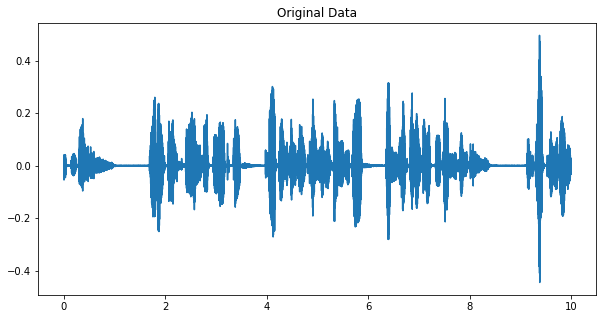

In [18]:
path_original='Dataset/train/de_f_5d2e7f30d69f2d1d86fd05f3bbe120c2.fragment1.flac'

data_original,frame_original = sf.read(path_original)

time_original=np.linspace(0, len(data_original)/frame_original, num=len(data_original))

plt.figure(figsize=(10,5))
plt.title('Original Data')
plt.plot(time_original,data_original)

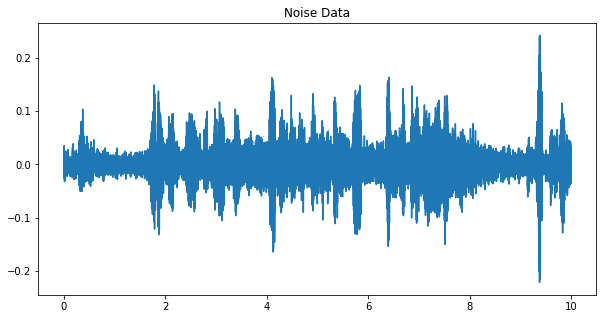

In [19]:
path_noise='Dataset/train/de_f_5d2e7f30d69f2d1d86fd05f3bbe120c2.fragment1.noise1.flac'

data_noise,frame_noise = sf.read(path_noise)

time_noise=np.linspace(0, len(data_noise)/frame_noise, num=len(data_noise))

plt.figure(figsize=(10,5))
plt.title('Noise Data')
plt.plot(time_noise,data_noise)

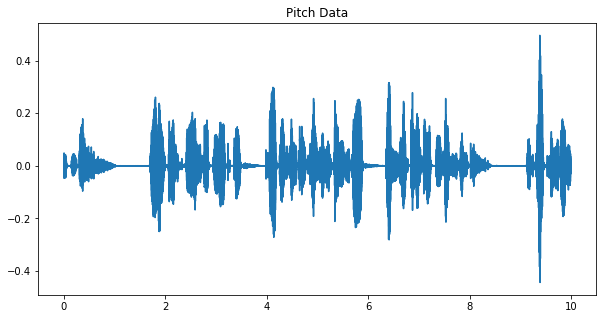

In [20]:
path_pitch='Dataset/train/de_f_5d2e7f30d69f2d1d86fd05f3bbe120c2.fragment1.pitch1.flac'

data_pitch,frame_pitch = sf.read(path_pitch)

time_pitch=np.linspace(0, len(data_pitch)/frame_pitch, num=len(data_pitch))

plt.figure(figsize=(10,5))
plt.title('Pitch Data')
plt.plot(time_pitch,data_pitch)

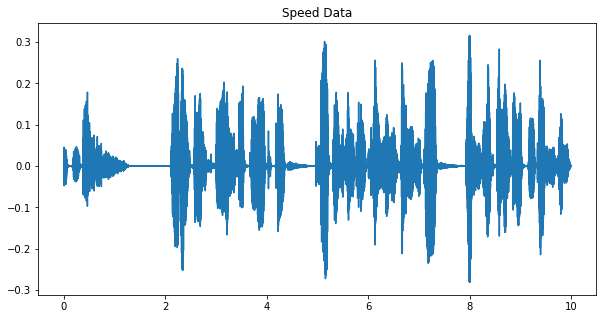

In [21]:
path_speed='Dataset/train/de_f_5d2e7f30d69f2d1d86fd05f3bbe120c2.fragment1.speed1.flac'

data_speed,frame_speed = sf.read(path_speed)

time_speed=np.linspace(0, len(data_speed)/frame_speed, num=len(data_speed))

plt.figure(figsize=(10,5))
plt.title('Speed Data')
plt.plot(time_speed,data_speed)

In [22]:
df_train.to_pickle('df_train.pickle')

In [23]:
df_test.to_pickle('df_test.pickle')

## Data picky and another visualization

In [1]:
import pandas as pd
import soundfile as sf
from python_speech_features import mfcc, logfbank
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_train=pd.read_pickle('df_train.pickle')

In [3]:
df_test=pd.read_pickle('df_test.pickle')

In [4]:
df_train.shape,df_test.shape

((73080, 8), (540, 8))

In [5]:
def label(text):
    if text=='Germany':
        return 0
    elif text=='English':
        return 1
    else:
        return 2

###### Test Data

In [6]:
df_test_=df_test.drop(['language','gender','transformation','Gender','Transformation'],axis=1)

In [7]:
df_test_['label']=df_test_['Language'].apply(label)

##### Train

In [8]:
df_train.shape

(73080, 8)

In [9]:
index=df_train[df_train['duration']>10].index

In [10]:
df_train.drop(index,inplace=True)

In [11]:
index=df_train[df_train['Transformation']!='No Transformation'].index

In [12]:
df_train.drop(index,inplace=True)

In [13]:
df_train.shape

(2520, 8)

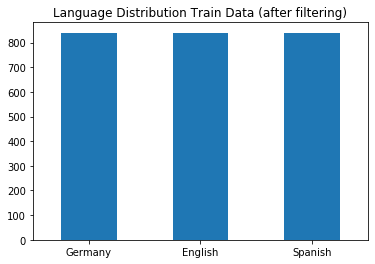

In [14]:
df_train.Language.value_counts().plot(kind='bar',title='Language Distribution Train Data (after filtering)',rot=0)

In [15]:
df_train_=df_train

In [16]:
df_train_.reset_index(inplace=True)

In [17]:
df_train_=df_train_.drop(['language','gender','transformation','Gender','Transformation','index'],axis=1)

In [18]:
df_train_['label']=df_train_['Language'].apply(label)

In [19]:
germany=df_train_['filename'].loc[838]

In [20]:
english=df_train_['filename'].loc[841]

In [21]:
spanish=df_train_['filename'].loc[1691]

In [22]:
def fft_calculation(y,rate):
    n=len(y)
    freq=np.fft.rfftfreq(n,d=1/rate)
    Y=abs(np.fft.rfft(y)/n)
    return (Y,freq)

In [23]:
def fbank_calculation(y,rate):
    #calculate logfbank only for three second
    return logfbank(y[:int(3*rate)]).T

In [24]:
def mfcc_calculation(y,rate):
    #calculate logfbank only for three second
    return mfcc(y[:int(3*rate)]).T

In [25]:
signal_germany,samplerate=sf.read('Dataset/train/'+germany)

In [26]:
signal_english,samplerate=sf.read('Dataset/train/'+english)

In [27]:
signal_spanish,samplerate=sf.read('Dataset/train/'+spanish)

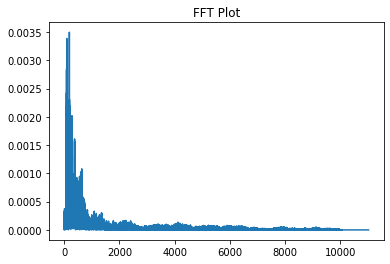

In [28]:
y,freq=fft_calculation(signal_germany,samplerate)
plt.title('FFT Plot')
plt.plot(freq,y)

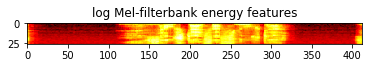

In [29]:
germany_fbank=fbank_calculation(signal_germany,samplerate)
plt.title('log Mel-filterbank energy features')
plt.imshow(germany_fbank,cmap='hot', interpolation='nearest')

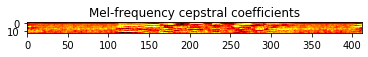

In [30]:
germany_mfcc=mfcc_calculation(signal_germany,samplerate)
plt.title('Mel-frequency cepstral coefficients')
plt.imshow(germany_mfcc,cmap='hot', interpolation='nearest')

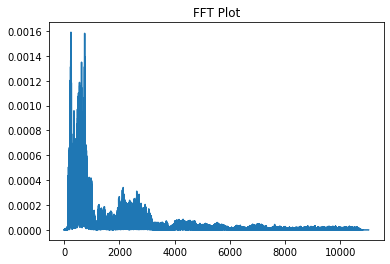

In [31]:
y,freq=fft_calculation(signal_english,samplerate)
plt.title('FFT Plot')
plt.plot(freq,y)

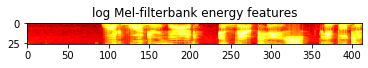

In [32]:
english_fbank=fbank_calculation(signal_english,samplerate)
plt.title('log Mel-filterbank energy features')
plt.imshow(english_fbank,cmap='hot', interpolation='nearest')

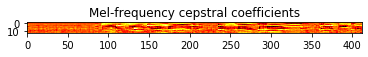

In [33]:
english_mfcc=mfcc_calculation(signal_english,samplerate)
plt.title('Mel-frequency cepstral coefficients')
plt.imshow(english_mfcc,cmap='hot', interpolation='nearest')

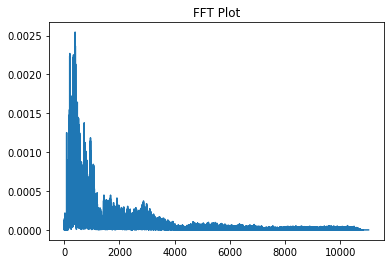

In [34]:
y,freq=fft_calculation(signal_spanish,samplerate)
plt.title('FFT Plot')
plt.plot(freq,y)

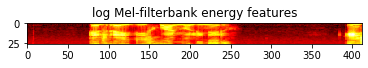

In [35]:
spanish_fbank=fbank_calculation(signal_spanish,samplerate)
plt.title('log Mel-filterbank energy features')
plt.imshow(spanish_fbank,cmap='hot', interpolation='nearest')

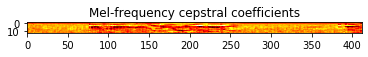

In [36]:
spanish_mfcc=mfcc_calculation(signal_spanish,samplerate)
plt.title('Mel-frequency cepstral coefficients')
plt.imshow(spanish_mfcc,cmap='hot', interpolation='nearest')

In [37]:
df_train_.to_pickle('train_map.pickle')

In [38]:
df_test_.to_pickle('test_map.pickle')